In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(33)

In [2]:
max_epoch = 20

In [3]:
def sign(a):
  return 2*np.sign(np.sign(a)+1) - 1

In [4]:
# data
X_50 = np.random.choice([-1, 1], size=(50,1024), p=[.5,.5])
Y_50 = np.random.choice([-1, 1], size=(50,512), p=[.5,.5])

X_100 = np.random.choice([-1, 1], size=(100,1024), p=[.5,.5])
Y_100 = np.random.choice([-1, 1], size=(100,512), p=[.5,.5])

X_200 = np.random.choice([-1, 1], size=(200,1024), p=[.5,.5])
Y_200 = np.random.choice([-1, 1], size=(200,512), p=[.5,.5])

In [5]:
# bidirectional associative memory

def error(Data_X, Data_Y, W, max_epoch=max_epoch):
  '''
  Generate error log
  '''
  log = [0]*max_epoch
  for x, y in zip(Data_X, Data_Y):
    xx = copy.deepcopy(x)
    for epoch in range(max_epoch):
      yy = sign(W @ xx) 
      xx = sign(W.T @ yy)
      log[epoch] += np.count_nonzero(y - yy)
  log = np.array(log)/Data_X.shape[0]
  return log

The model perfectly retrives stored vectors from the first time step for $D_{50}$ data.


Text(0.5, 1.0, '(c) $D_{50}$ with no noise')

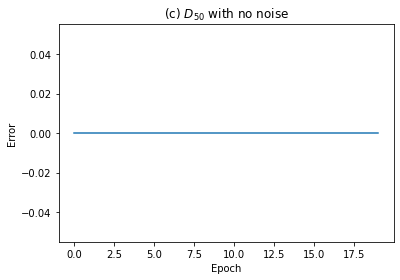

In [6]:
# weight matrix
X = copy.deepcopy(X_50) 
Y = copy.deepcopy(Y_50)
W = Y.T @ X

Data_X = copy.deepcopy(X)
Data_Y = copy.deepcopy(Y)

plt.plot(range(max_epoch), error(Data_X, Data_Y, W))
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('(c) $D_{50}$ with no noise')

In [7]:
M = [0,1,2,3,5,7,10,15,20,30,50,100]

In [8]:
# 12 data sets of 10 noisy vectors

def deviate(prototype_x, prototype_y, m):
  '''
  Return data of 10 noisy vectors similar to 
  a prototype_x with m incorrect positions 
  together with prototype_y data
  '''
  X_set = []
  Y_set = []
  for _ in range(10):
    template = copy.deepcopy(prototype_x)
    choices = np.random.choice(1024, m)
    for choice in choices:
      template[choice] += 10*np.random.randn()
    X_set.append(template)
    Y_set.append(prototype_y)
  return np.array(X_set), np.array(Y_set)

Noisy vectors from the $D_{50}$ data are quickly corrected.



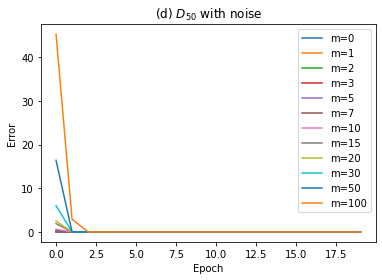

In [9]:
# weight matrix
X = copy.deepcopy(X_50) 
Y = copy.deepcopy(Y_50)
W = Y.T @ X

prototype_x = copy.deepcopy(X)[9]
prototype_y = copy.deepcopy(Y)[9]

# plot the error curve for each m
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('(d) $D_{50}$ with noise')
for m in M:
  Data_X, Data_Y = deviate(prototype_x, prototype_y, m)
  plt.plot(range(max_epoch), error(Data_X, Data_Y, W), label=f'm={m}')
plt.legend()

Noisy vectors from the $D_{100}$ are also corrected but at lower rate.

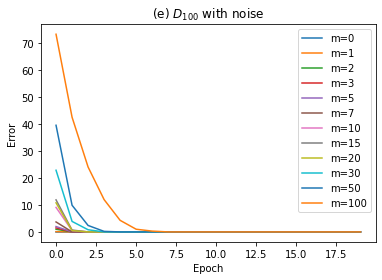

In [10]:
# weight matrix
X = copy.deepcopy(X_100) 
Y = copy.deepcopy(Y_100)
W = Y.T @ X

prototype_x = copy.deepcopy(X)[9]
prototype_y = copy.deepcopy(Y)[9]

# plot the error curve for each m
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('(e) $D_{100}$ with noise')
for m in M:
  Data_X, Data_Y = deviate(prototype_x, prototype_y, m)
  plt.plot(range(max_epoch), error(Data_X, Data_Y, W), label=f'm={m}')
plt.legend()

The error for noisy inputs from $D_{200}$ data does not converge to 0 because the model capacity is not enough to store $200$ patterns.

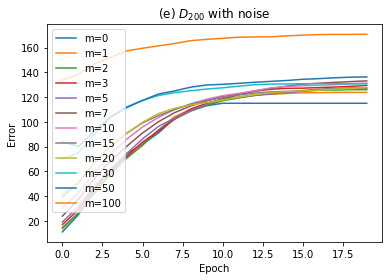

In [11]:
# weight matrix
X = copy.deepcopy(X_200) 
Y = copy.deepcopy(Y_200)
W = Y.T @ X

prototype_x = copy.deepcopy(X)[9]
prototype_y = copy.deepcopy(Y)[9]

# plot the error curve for each m
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('(e) $D_{200}$ with noise')
for m in M:
  Data_X, Data_Y = deviate(prototype_x, prototype_y, m)
  plt.plot(range(max_epoch), error(Data_X, Data_Y, W), label=f'm={m}')
plt.legend()